In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/new_file.csv')

In [4]:
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1


## The dataset we will be using have these columns -

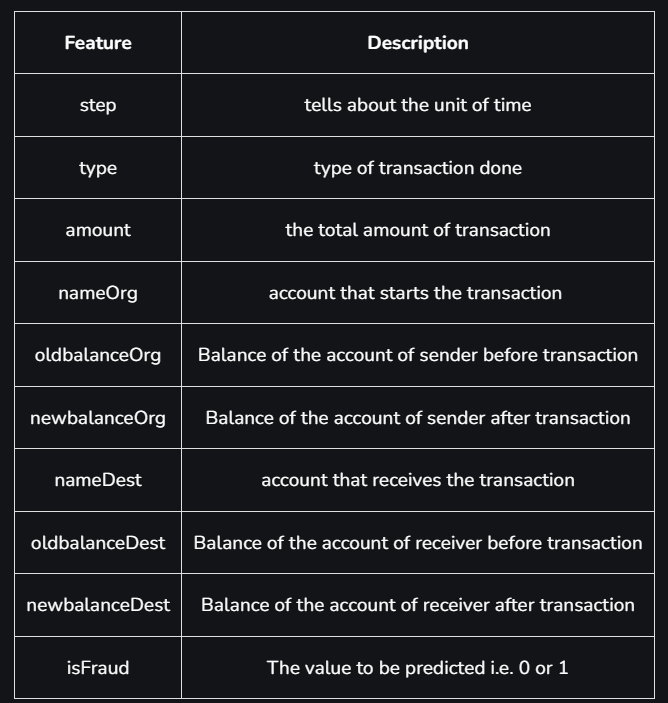

In [5]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 485.4+ MB


In [7]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00


In [8]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

int_ = (data.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))

fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))

Categorical variables: 3
Integer variables: 2
Float variables: 5


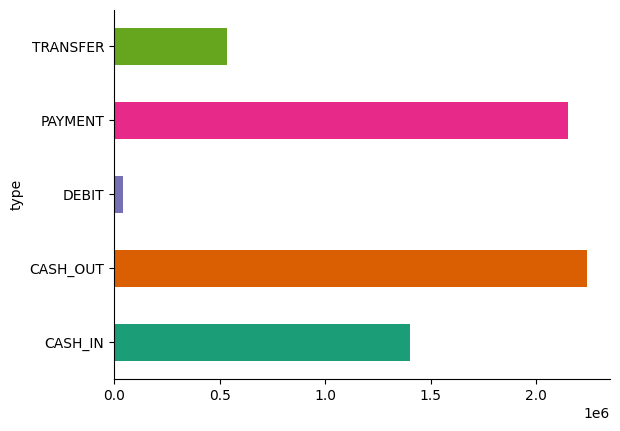

In [9]:

data.groupby('type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

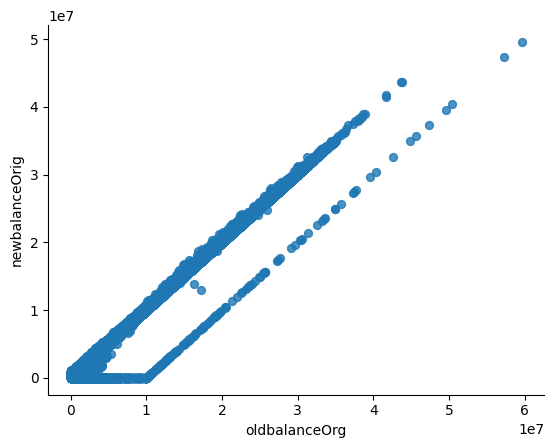

In [10]:
data.plot(kind='scatter', x='oldbalanceOrg', y='newbalanceOrig', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

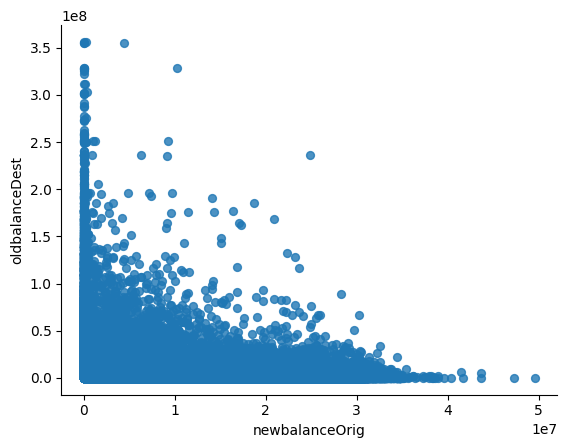

In [11]:
data.plot(kind='scatter', x='newbalanceOrig', y='oldbalanceDest', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: xlabel='type', ylabel='amount'>

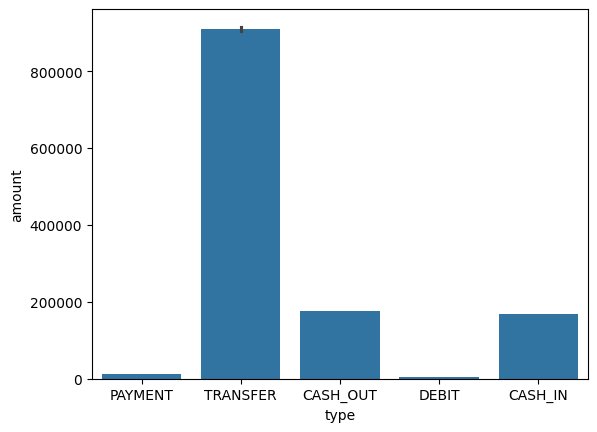

In [12]:
sns.barplot(x='type', y='amount', data=data)

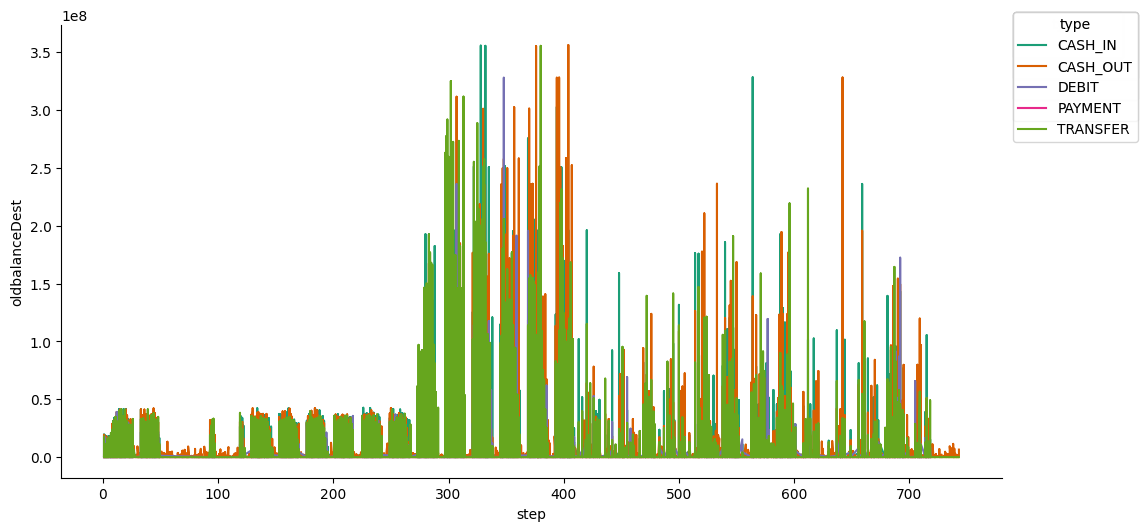

In [13]:
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['step']
  ys = series['oldbalanceDest']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('step', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('type')):
  _plot_series(series, series_name, i)
  fig.legend(title='type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('step')
_ = plt.ylabel('oldbalanceDest')

/tmp/ipython-input-14-3538251882.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_by_type.index, y=fraud_by_type.values, palette='coolwarm')


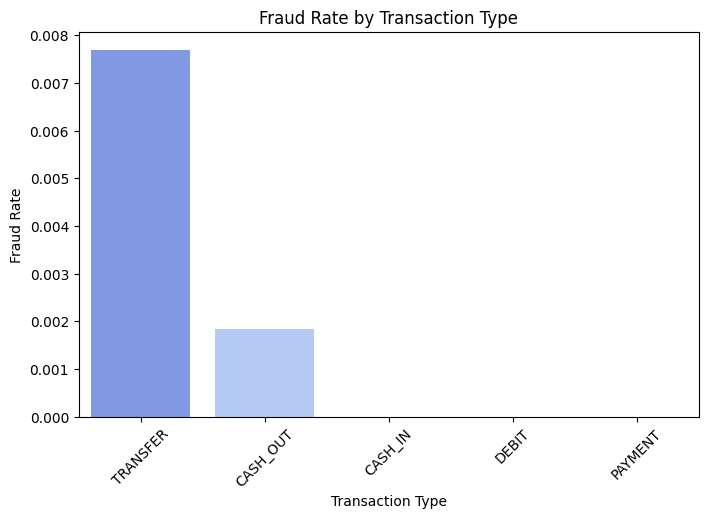

In [14]:
fraud_by_type = data.groupby('type')['isFraud'].mean().sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=fraud_by_type.index, y=fraud_by_type.values, palette='coolwarm')
plt.title("Fraud Rate by Transaction Type")
plt.ylabel("Fraud Rate")
plt.xlabel("Transaction Type")
plt.xticks(rotation=45)
plt.show()


/tmp/ipython-input-15-140059237.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_rate_by_bin = data.groupby('amount_bin')['isFraud'].mean()


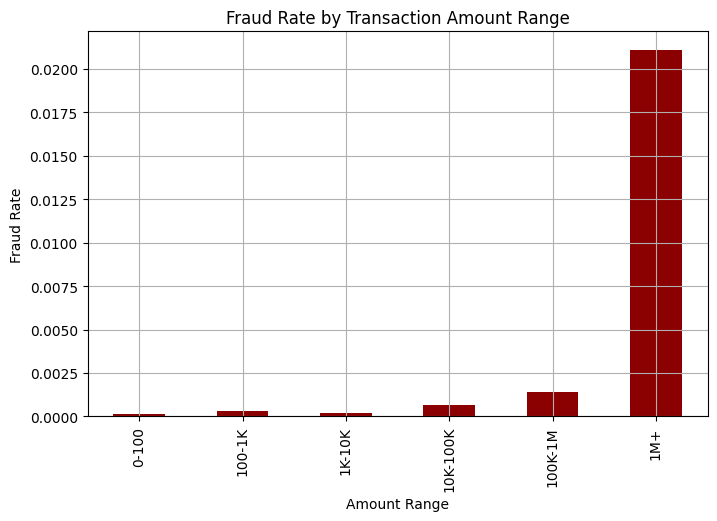

In [15]:
bins = [0, 100, 1000, 10000, 100000, 1000000, 10000000]
labels = ['0-100', '100-1K', '1K-10K', '10K-100K', '100K-1M', '1M+']
data['amount_bin'] = pd.cut(data['amount'], bins=bins, labels=labels)

fraud_rate_by_bin = data.groupby('amount_bin')['isFraud'].mean()

plt.figure(figsize=(8,5))
fraud_rate_by_bin.plot(kind='bar', color='darkred')
plt.title('Fraud Rate by Transaction Amount Range')
plt.ylabel('Fraud Rate')
plt.xlabel('Amount Range')
plt.grid(True)
plt.show()


In [16]:
data['isFraud'].value_counts()

,count
isFraud,
0,6354407
1,8213


/tmp/ipython-input-17-4136939762.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['step'], bins=50)


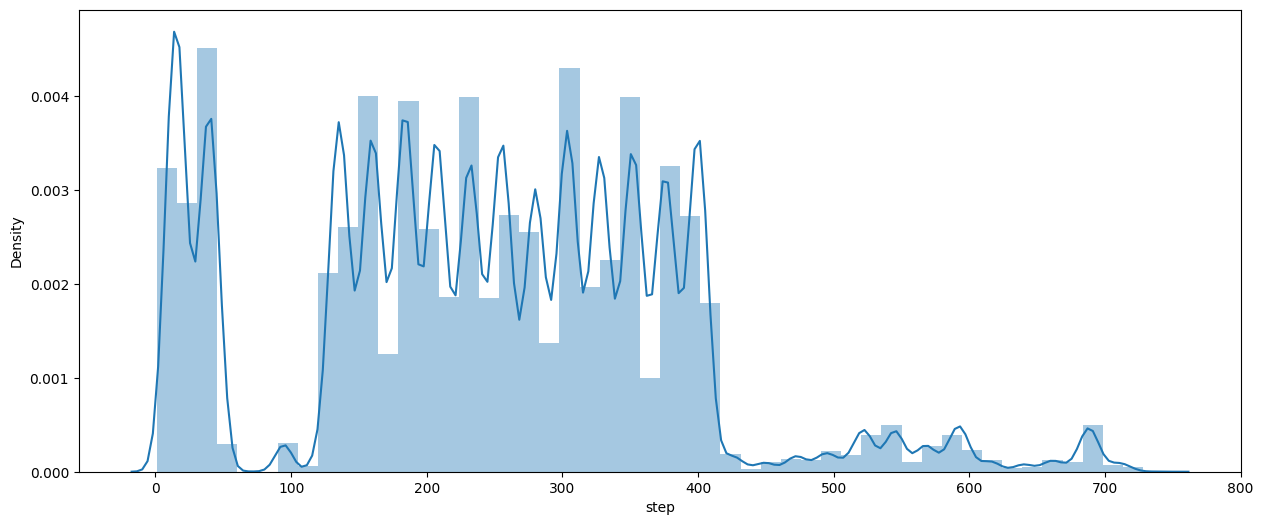

In [17]:
plt.figure(figsize=(15, 6))
sns.distplot(data['step'], bins=50)
import warnings
warnings.filterwarnings('ignore')

<Axes: >

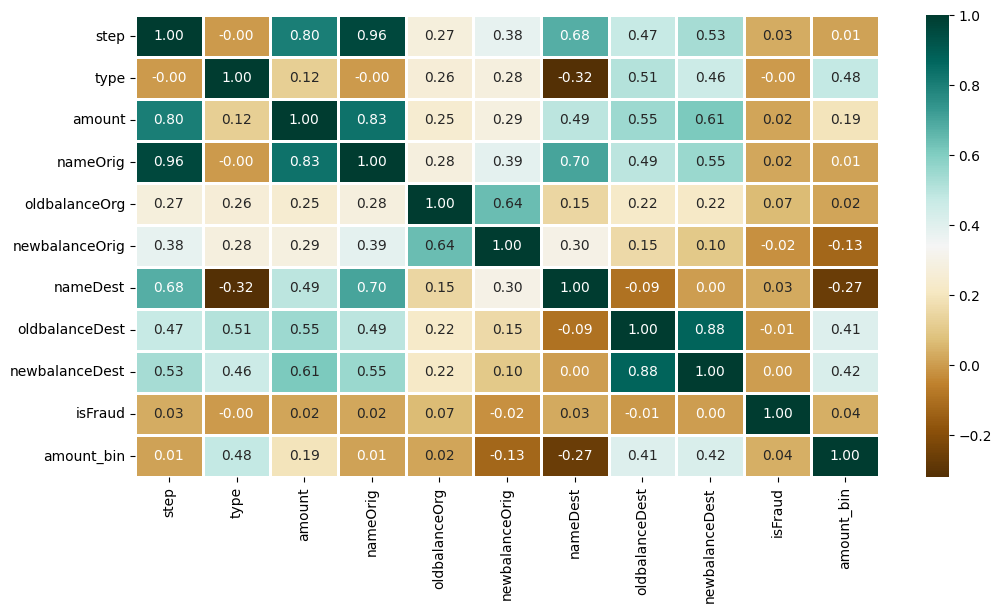

In [18]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.apply(lambda x: pd.factorize(x)[0]).corr(),
			cmap='BrBG',
			fmt='.2f',
			linewidths=2,
			annot=True)

In [19]:
type_new = pd.get_dummies(data['type'], drop_first=True)
data_new = pd.concat([data, type_new], axis=1)
data_new.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,amount_bin,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,1K-10K,False,False,True,False
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,1K-10K,False,False,True,False
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,100-1K,False,False,False,True
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,100-1K,True,False,False,False
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,10K-100K,False,False,True,False


In [20]:
X = data_new.drop(['isFraud', 'type', 'nameOrig', 'nameDest'], axis=1)
y = data_new['isFraud']

In [21]:
X.shape, y.shape

((6362620, 11), (6362620,))

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score as ras
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier

# Drop the 'amount_bin' column from X_train and X_test
X_train_numeric = X_train.drop('amount_bin', axis=1)
X_test_numeric = X_test.drop('amount_bin', axis=1)

# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
}

# Create a GridSearchCV object for XGBoost
xgb_grid = GridSearchCV(XGBClassifier(), param_grid, cv=3, scoring='roc_auc')

# Fit the GridSearchCV object to the training data
xgb_grid.fit(X_train_numeric, y_train)

# Print the best parameters and the best score
print("Best parameters for XGBoost:", xgb_grid.best_params_)
print("Best ROC AUC score for XGBoost:", xgb_grid.best_score_)

# Evaluate the best XGBoost model on the test set
best_xgb_model = xgb_grid.best_estimator_
y_preds = best_xgb_model.predict_proba(X_test_numeric)[:, 1]
print('Validation Accuracy of Best XGBoost Model : ', ras(y_test, y_preds))

# Evaluate other models
models = [LogisticRegression(), RandomForestClassifier(n_estimators=7,criterion='entropy',random_state=7)]

for model in models:
    model.fit(X_train_numeric, y_train)
    print(f'{model} : ')

    train_preds = model.predict_proba(X_train_numeric)[:, 1]
    print('Training Accuracy : ', ras(y_train, train_preds))

    y_preds = model.predict_proba(X_test_numeric)[:, 1]
    print('Validation Accuracy : ', ras(y_test, y_preds))
    print()

Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best ROC AUC score for XGBoost: 0.99887947309787
Validation Accuracy of Best XGBoost Model :  0.9971059010760225
LogisticRegression() : 
Training Accuracy :  0.8929329990624075
Validation Accuracy :  0.8908972709041625

RandomForestClassifier(criterion='entropy', n_estimators=7, random_state=7) : 
Training Accuracy :  0.9999992716004644
Validation Accuracy :  0.9650098729693373



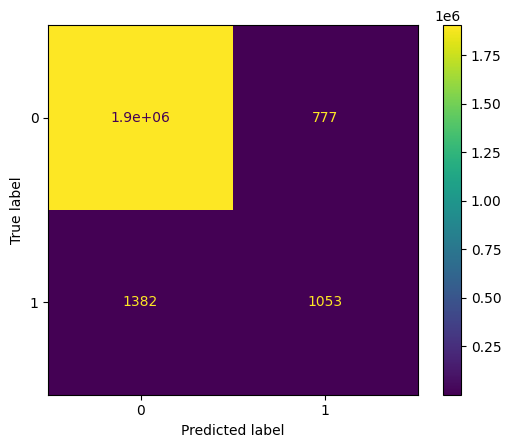

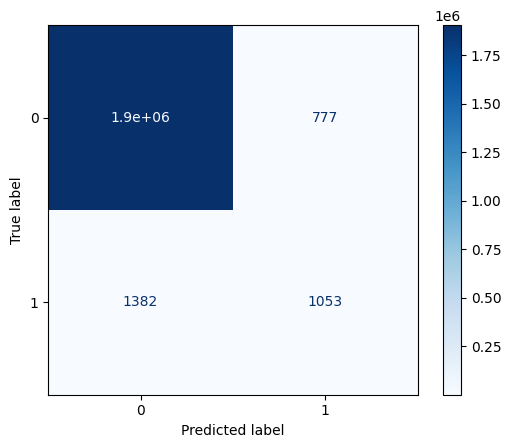

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = ConfusionMatrixDisplay.from_estimator(models[1], X_test_numeric, y_test)

cm.plot(cmap='Blues')

plt.show()

In [25]:
import pickle
# Extract the trained XGBoost model from the models list
xgb_model = models[1]
with open("fraud_model.pkl", "wb") as f:
    pickle.dump(xgb_model, f)